In [41]:
import sys
import copy
sys.path.insert(0, "..")
from classes.atom_classes.atom import Atom
from classes.atom_classes.atom_collection import Atom_Collection
from classes.atom_classes.atom_collection_plotter import Atom_Collection_Plotter, Animator
from classes.descriptors import DistanceMoments
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
plt.rc('animation', html='jshtml')

In [42]:
pos_flat = np.loadtxt('lj10clusters.txt')
positions = pos_flat.reshape(-1,pos_flat.shape[1]//2,2)
atom_cols = [Atom_Collection([Atom(position=pos) for pos in poses]) for poses in positions]
dist_mom = DistanceMoments(color="C4")

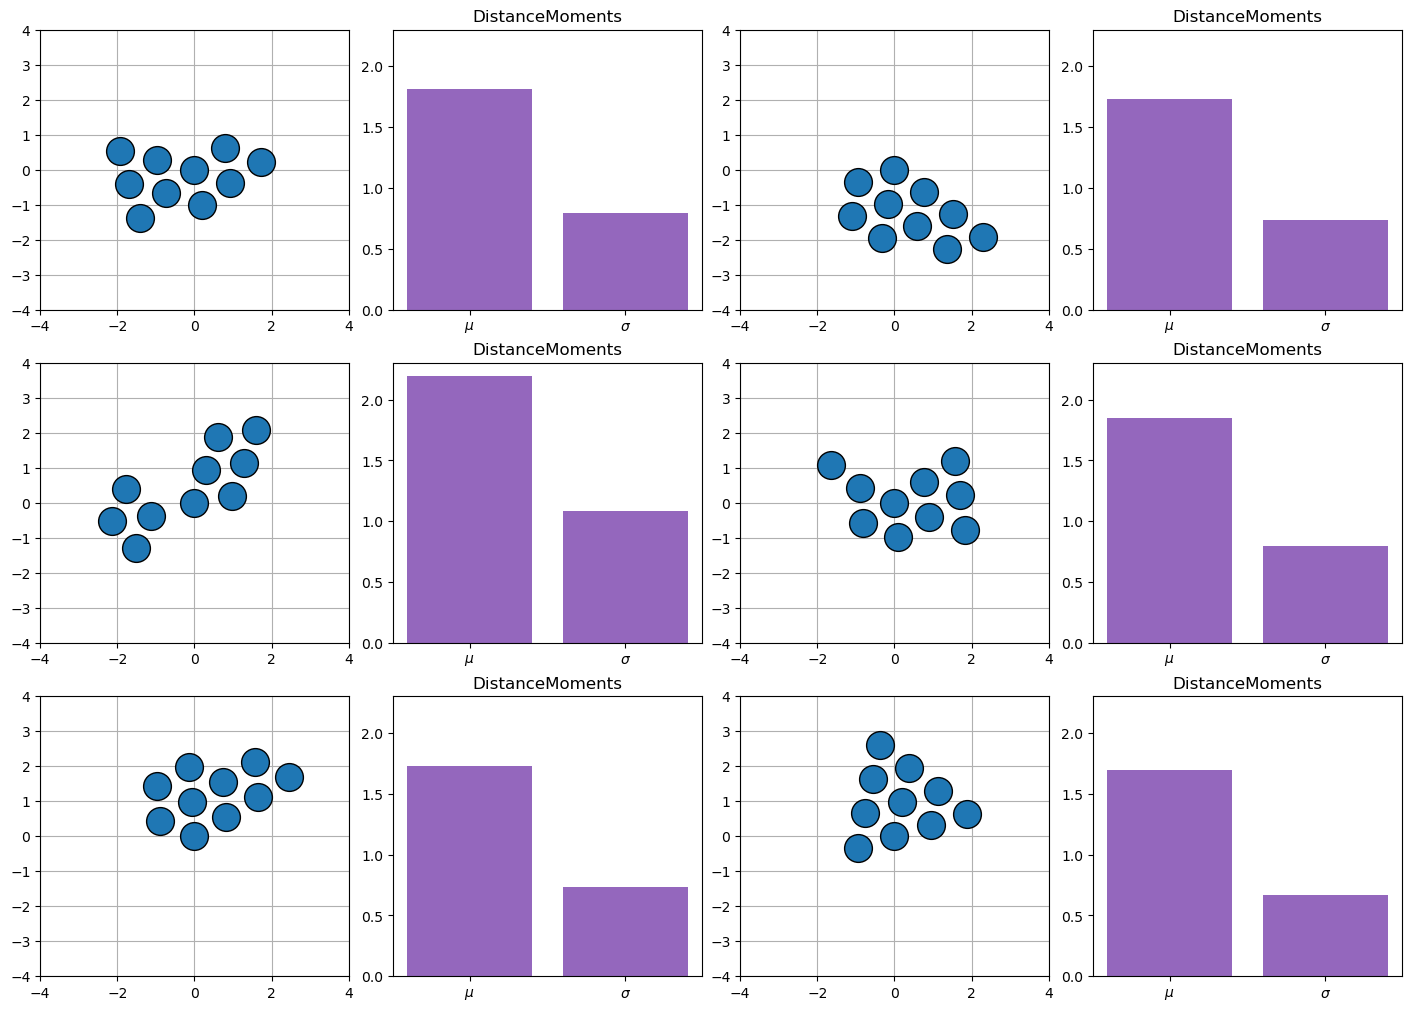

In [43]:
fig, axs = plt.subplots(3,4, figsize=(14,10), layout="constrained")
j = 0
atom_plotter = Atom_Collection_Plotter(markersize=20)
for i in [0, 2]:
    for ax1, ax2 in zip(axs[:,i], axs[:,i+1]):
        ax1.set_xlim([-4,4])
        ax1.set_ylim([-4,4])
        ax1.grid()
        dist_mom.plot(atom_col=atom_cols[j], ax=ax2)
        atom_cols[j].reset_plot_axes()
        atom_plotter(atom_cols[j], ax=ax1)
        j+=1

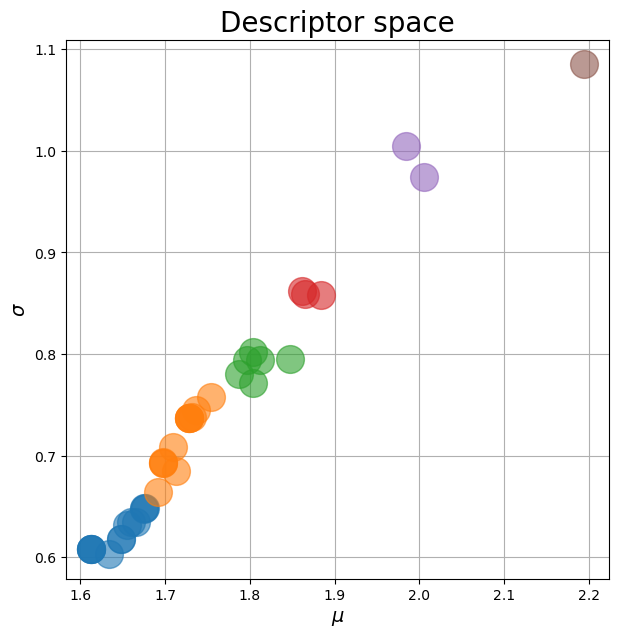

In [83]:
descriptors = np.array([dist_mom.get_descriptor(atom_col=atom_col) for atom_col in atom_cols])
mu_ranges = [[2.1, 2.3],
             [1.95, 2.1],
             [1.85,1.94],
             [1.78,1.849],
             [1.69, 1.77],
             [1.5,1.68]
             ][::-1]

descriptors_sorted = {}
atom_cols_sorted = {}
indices_sorted = {}
for i in range(len(mu_ranges)):
    descriptors_sorted[f"C{i}"] = []
    atom_cols_sorted[f"C{i}"] = []
    indices_sorted[f"C{i}"] = []

for i, atom_col, descriptor in zip(range(len(descriptors)), atom_cols, descriptors):
    for j, mu_range in enumerate(mu_ranges):
        if descriptor[0] > mu_range[0] and descriptor[0] < mu_range[1]:
            descriptors_sorted[f"C{j}"].append(descriptor)
            atom_cols_sorted[f"C{j}"].append(atom_col)
            indices_sorted[f"C{j}"].append(i)
fig, ax = plt.subplots(figsize=(7,7))
ax.grid()
ax.set_xlabel(r"$\mu$", fontsize=14)
ax.set_ylabel(r"$\sigma$", fontsize=14)
ax.set_title("Descriptor space", fontsize=20)

for color in descriptors_sorted:
    descs = descriptors_sorted[color]
    for desc in descs:
        ax.plot(desc[0], desc[1], "o", c=color, markersize=20, alpha=0.6)


In [84]:
class cluster_anim(Animator):
    def __init__(self, default_cols=..., markersize=50, scale_with_mass=False, alpha=1) -> None:
        super().__init__(default_cols, markersize, scale_with_mass, alpha)
    
    def animate(self, ax, atom_col, displacement):
        atom_col.move_atoms(displacement)
        self(atom_col, ax=ax)
        atom_col.move_atoms(-displacement)

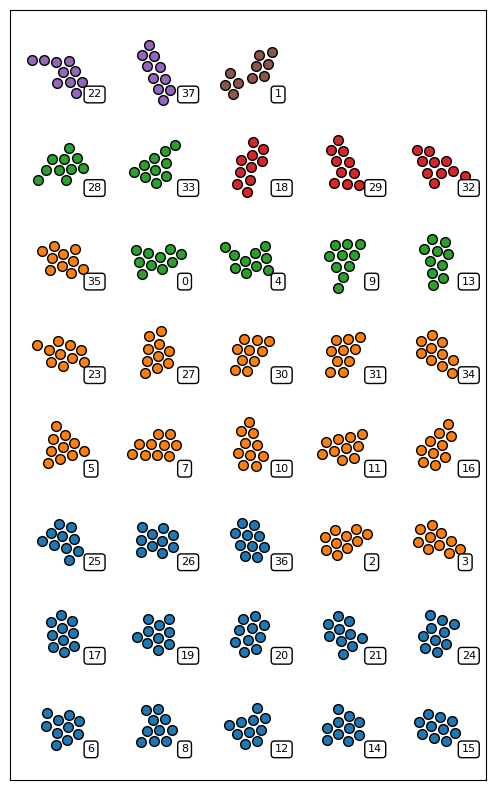

In [96]:
fig, ax = plt.subplots(figsize=(9, 10))
atom_plotters = {color: cluster_anim(markersize=7, default_cols=(color, "C1")) for color in atom_cols_sorted}

disp_x = 7.5
disp_y = 7.5

i = 0
j = 0

for color in atom_cols_sorted:
    atom_plotter = atom_plotters[color]
    atom_cols_plot = atom_cols_sorted[color]
    indices = indices_sorted[color]
    for atom_col, index in zip(atom_cols_plot, indices):
        atom_col.reset_plot_axes()
        center_mass = np.mean(atom_col.positions, axis=0)
        disp = np.ones(shape=atom_col.positions.shape)
        disp[:,0]*=i*disp_x
        disp[:,1]*=j*disp_y
        atom_plotter.animate(ax=ax, atom_col=atom_col, displacement=disp-center_mass)
        ax.annotate(text=f"{index}", xy=(i*disp_x+2.0, j*disp_y-2.0), fontsize=8, bbox=dict(boxstyle="round", fc="w"))
        i+=1
        if i == 5:
            i = 0
            j += 1

ax.set_aspect("equal")
s = ax.set_xticks([])
s = ax.set_yticks([])